## Using Fairlearn to detect gender bias in music recommender system: Spotify Million Dataset

### Baseline Recommender: Popularity-Based

In [1]:
# Our Baseline recommender using item popularity

import pandas as pd

# Load data
interactions_df = pd.read_csv("interactions.csv")
track_metadata_df = pd.read_csv("track_metadata.csv")

# Count how many times each track appears (popularity)
track_popularity = interactions_df['track_index'].value_counts().reset_index()
track_popularity.columns = ['track_index', 'play_count']

# Merge with metadata to get artist gender
popular_tracks = track_popularity.merge(track_metadata_df, on='track_index', how='left')

# Preview the most popular tracks
print("Top 100 Most Popular Tracks:")
print(popular_tracks.head(10))

# Recommend top-N tracks
N = 100
def recommend_popular_tracks(top_n=N):

    return popular_tracks.head(top_n)[['track_index', 'artist_gender', 'play_count']]

# Example usage
recommendations = recommend_popular_tracks()
print("\nTop N Popular Track Recommendations:")
print(recommendations)

Top 100 Most Popular Tracks:
   track_index  play_count                             track_uri  \
0       102035        4562  spotify:track:7KXjTSCq5nL1LoYtL7XAwS   
1        27741        4355  spotify:track:1xznGGDReH1oQq0xzbwXa3   
2       108379        4105  spotify:track:7yyRTcZmCiyzzJlNzGC9Ol   
3        49986        3985  spotify:track:3a1lNhkSLSkpJE4MSHpDu9   
4        79319        3540  spotify:track:5hTpBe8h35rJ67eAWHQsJx   
5        15255        3485  spotify:track:152lZdxL1OR0ZMW6KquMif   
6        31318        3473  spotify:track:2EEeOnHehOozLq4aS0n6SL   
7       101161        3456  spotify:track:7GX5flRQZVHRAGd6B4TmDO   
8         6392        3393  spotify:track:0SGkqnVQo9KPytSri1H6cF   
9        84200        3319  spotify:track:62vpWI1CHwFy7tMIcSStl8   

       artist_gender  
0               male  
1               male  
2               male  
3               male  
4               male  
5               male  
6               male  
7  non-binary gender  
8              

In [2]:
#save top_n_track_ids
top_n_track_ids = set(recommendations['track_index'].tolist())

In [ ]:
# Filter only the top-N recommended tracks
recommended_tracks = popular_tracks[popular_tracks['track_index'].isin(top_n_track_ids)]

# Show distribution of artist gender
gender_distribution = recommended_tracks['artist_gender'].value_counts(normalize=True) * 100

# Print result
print("Gender distribution in Top 100 Recommended Tracks (%):")
print(gender_distribution.round(2))

🎯 Gender distribution in Top 100 Recommended Tracks (%):
artist_gender
male                 91.0
female                6.0
non-binary gender     3.0
Name: proportion, dtype: float64


# Popularity-Based Baseline Recommender: Interpretation

We implemented a popularity-based recommender system that recommends the same **Top 100 most popular tracks** to every user. These tracks were identified based on how frequently they appeared across all playlists.

---

## Gender Distribution in Top 100 Tracks

Below is the approximate gender distribution among the Top 100 tracks recommended:

| Artist Gender       | Percentage (%) |
|---------------------|----------------|
| male                | 91%            |
| female              | 6%             |
| non-binary gender   | 3%             |

---

>  **Observation:** The popularity-based recommender overwhelmingly favors male artists. This may reflect user behavior in the dataset or historical disparities in artist exposure, but it raises concerns about fairness and representation.

**Key Insight:** The popularity-based recommender system, while simple and effective at surfacing the most played tracks, **amplifies existing gender biases** present in the dataset. In fact, **over 90% of the Top 100 recommended tracks are by male artists**, with only a small fraction representing female or non-binary artists.

---

### Implications:

- The model recommends tracks purely based on their historical frequency in playlists.
- Since male artists dominate historical listening behavior in the dataset, the recommender **over-represents male artists**.
- All users receive the same recommendations — meaning the bias is applied uniformly and **systematically reinforces a skewed distribution**.
- While this model is useful as a **baseline benchmark**, it is **not suitable for fair or inclusive recommendation tasks**.

### Bias detection using Fairlearn

In [2]:
#install requires libraries
#!pip install fairlearn scikit-learn matplotlib pandas

#sucessfully installed


In [ ]:
#due to a conflict uninstall numpy scipy scikit-learn fairlearn -y
#!pip uninstall numpy scipy scikit-learn fairlearn -y

Found existing installation: numpy 1.26.4

You can safely remove it manually.
You can safely remove it manually.



Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.16.0
Uninstalling scipy-1.16.0:
  Successfully uninstalled scipy-1.16.0
Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0
Found existing installation: fairlearn 0.12.0
Uninstalling fairlearn-0.12.0:
  Successfully uninstalled fairlearn-0.12.0


In [ ]:
#and install again in the following order 
#!pip install numpy==1.26.4
#!pip install scipy
#!pip install scikit-learn
#!pip install fairlearn

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aif360 0.6.1 requires scikit-learn>=1.0, which is not installed.
aif360 0.6.1 requires scipy>=1.2.0, which is not installed.
imagehash 4.3.2 requires scipy, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, which is not installed.
implicit 0.7.2 requires scipy>=0.16, which is not installed.
missingno 0.5.2 requires scipy, which is not installed.
pandas-profiling 3.2.0 requires scipy>=1.4.1, which is not installed.
phik 0.12.4 requires scipy>=1.5.2, which is not installed.
recbole 1.2.1 requires scikit-learn>=0.23.2, which is not installed.
recbole 1.2.1 requires scipy>=1.6.0, which is not installed.
xgboost 2.1.3 requires scipy, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you hav

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aif360 0.6.1 requires scikit-learn>=1.0, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
recbole 1.2.1 requires scikit-learn>=0.23.2, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.



  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl (38.6 MB)
  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


  Using cached fairlearn-0.12.0-py3-none-any.whl.metadata (7.0 kB)
Using cached fairlearn-0.12.0-py3-none-any.whl (240 kB)


In [5]:
#check if packages are working
import numpy as np
import pandas as pd
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

print("Packages are working fine!")

Packages are working fine!


In [6]:
#import additional libraries
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio
import matplotlib.pyplot as plt

### Prepare Input for using Fairlearn and Treat Top-100 tracks from the model as recommended

In [ ]:
import pandas as pd

# Load your data
interactions_df = pd.read_csv("interactions.csv")
track_metadata_df = pd.read_csv("track_metadata.csv")  

# Compute popularity
track_popularity = interactions_df['track_index'].value_counts().reset_index()
track_popularity.columns = ['track_index', 'play_count']

# Step 1: Define Top-N recommended track IDs
N = 100
top_n_track_ids = track_popularity.head(N)['track_index'].tolist()

# Step 2: Merge full metadata with popularity (not just popular tracks)
full_tracks = track_metadata_df.merge(track_popularity, on='track_index', how='left')

# Step 3: Fill missing play counts with 0
full_tracks['play_count'] = full_tracks['play_count'].fillna(0)

# Step 4: Label top-N tracks as 1, all others as 0
full_tracks['label'] = full_tracks['track_index'].isin(top_n_track_ids).astype(int)

In [ ]:
# Absolute counts
print("Absolute Gender Distribution in Full Catalog:")
print(full_tracks['artist_gender'].value_counts(dropna=False))

# Percentage distribution
print("\nPercentage Distribution:")
print(full_tracks['artist_gender'].value_counts(normalize=True, dropna=False).mul(100).round(2))

🎯 Absolute Gender Distribution in Full Catalog:
artist_gender
male                 85720
female               22277
non-binary gender      442
genderfluid             92
trans woman             44
agender                 32
neutral sex              1
Name: count, dtype: int64

📊 Percentage Distribution:
artist_gender
male                 78.93
female               20.51
non-binary gender     0.41
genderfluid           0.08
trans woman           0.04
agender               0.03
neutral sex           0.00
Name: proportion, dtype: float64


If the recommender was perfectly unbiased and proportional, we’d expect about: 79 male tracks, 20 female tracks, 1 from non-binary or another minority group.

### Definition of Sensitive/Protected Attribute


In [ ]:
def map_gender_category(gender):
    gender = str(gender).strip().lower()
    if gender == 'male':
        return 'male'
    elif gender == 'female':
        return 'female'
    elif 'non-binary' in gender or 'nonbinary' in gender:
        return 'nonbinary'
    else:
        return 'other'

# Apply to new column
full_tracks['gender_grouped'] = full_tracks['artist_gender'].apply(map_gender_category)

### Metrics computation using Fairlearn

In [15]:
from fairlearn.metrics import MetricFrame, selection_rate

# Use full labeled dataset
y_true = full_tracks['label']
sensitive_attr = full_tracks['gender_grouped']  # multiclass: male, female, nonbinary, other

# MetricFrame for selection rate
mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_true,
    y_pred=y_true,  # for baseline recommender
    sensitive_features=sensitive_attr
)

# Print selection rate per gender group
print("🎯 Selection rate by gender group (multiclass):")
print(mf.by_group)

🎯 Selection rate by gender group (multiclass):
gender_grouped
female       0.000269
male         0.001062
nonbinary    0.006787
other        0.000000
Name: selection_rate, dtype: float64


### Visualize selection rates by gender groups

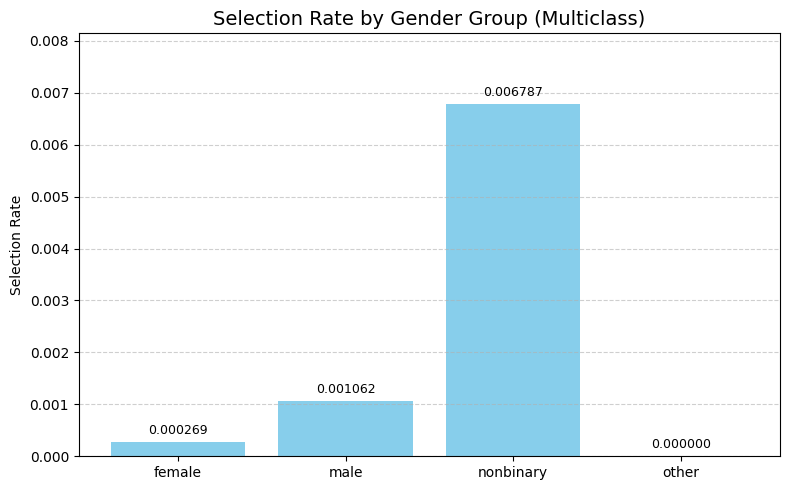

In [16]:
import matplotlib.pyplot as plt

# Extract selection rates from MetricFrame
selection_rates = mf.by_group  # This is a pandas Series

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(selection_rates.index, selection_rates.values, color='skyblue')

# Add title and axis labels
plt.title('Selection Rate by Gender Group (Multiclass)', fontsize=14)
plt.ylabel('Selection Rate')
plt.ylim(0, selection_rates.max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add exact values as text above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.0001,
             f'{height:.6f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Selection Rate by Gender Group

| Gender Group | Selection Rate      | Interpretation                                                  |
|--------------|---------------------|------------------------------------------------------------------|
| **Male**     | 0.001062 (0.11%)    | 🟢 Highest selection rate — most favored group                   |
| **Female**   | 0.000269 (0.03%)    | 🔴 Much lower selection rate — clear underrepresentation         |
| **Nonbinary**| 0.006787 (0.68%)    | 🟡 Very high relative to their catalog share — possible overrepresentation |
| **Other**    | 0.000000            | ⚠️ No tracks selected at all from this group                     |

---

### What This Means? 

- **Bias is present.** Male artists are ~4× more likely to be recommended than female artists.
- **Nonbinary overrepresentation**: although they make up <1% of the catalog, their selection rate is significantly higher.
- **No representation** for the "other" category — none of their tracks were recommended.

---

This outcome is based on selecting the **Top 100 most popular tracks**, and:
- Popularity often reflects **historical user behavior**, which can carry **inherent biases**.
- If male artists dominate in **past play counts**, they will also dominate in recommendations — unless mitigated.

---

### Inspection of Pairwise Demographic Parity Differences (DPD) 
These are useful for identifying specific fairness disparities between individual gender groups, rather than just looking at the overall range. This helps reveal whether certain groups are consistently under- or over-recommended relative to others. It also allows for a more nuanced understanding of fairness in multiclass settings, where biases may affect each group differently. By comparing each group pair directly, we can target mitigation efforts more precisely.

In [17]:
import pandas as pd
from fairlearn.metrics import demographic_parity_difference

# Define gender groups
gender_groups = full_tracks['gender_grouped'].unique()

# Collect pairwise DPDs
dpd_results = []

for i, group_a in enumerate(gender_groups):
    for j, group_b in enumerate(gender_groups):
        if i < j:
            binary_sensitive = full_tracks['gender_grouped'].apply(
                lambda x: 1 if x == group_a else (0 if x == group_b else None)
            )

            mask = binary_sensitive.notnull()

            dpd = demographic_parity_difference(
                y_true=full_tracks.loc[mask, 'label'],
                y_pred=full_tracks.loc[mask, 'label'],  # baseline model
                sensitive_features=binary_sensitive[mask]
            )

            dpd_results.append({
                'Group A': group_a,
                'Group B': group_b,
                'DP Difference (A vs B)': dpd
            })

# Show results
dpd_df = pd.DataFrame(dpd_results)
print(dpd_df)

     Group A    Group B  DP Difference (A vs B)
0     female       male                0.000792
1     female  nonbinary                0.006518
2     female      other                0.000269
3       male  nonbinary                0.005726
4       male      other                0.001062
5  nonbinary      other                0.006787


## Interpretation of Pairwise Demographic Parity Differences (DPD)

| Comparison             | DPD (A vs B) | Interpretation |
|------------------------|--------------|----------------|
| **female vs male**     | 0.000792     | Female artists are recommended less often than male artists. |
| **female vs nonbinary**| 0.006518     | Female artists are significantly under-recommended compared to nonbinary artists. |
| **female vs other**    | 0.000269     | A small difference suggests female and "other" groups are similarly underrepresented. |
| **male vs nonbinary**  | 0.005726     | Nonbinary artists are recommended more often than male artists. |
| **male vs other**      | 0.001062     | Male artists are recommended more than the "other" group. |
| **nonbinary vs other** | 0.006787     | The largest gap — nonbinary artists are far more likely to be recommended than those in the "other" group. |

---

### Key Insight of the DPD Evaluation
The largest disparities occur between nonbinary artists and all other groups, especially the "other" category. Female artists are consistently less recommended than both male and nonbinary artists, highlighting an area for potential fairness improvement.


## Bias Mitigation

### Bias Mitigation using all genders: (Female - Male - Non-binary - Others)

### In-Processing: Fairness-Aware Learning using Fairlearn’s ExponentiatedGradient

In [33]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# STEP 1: Prepare features, labels, and sensitive attribute
X = full_tracks[['play_count']]
y = full_tracks['label']
sensitive = full_tracks['gender_grouped']  # multiclass: male, female, nonbinary, other

# Combine into one DataFrame for stratified sampling
df_all = X.copy()
df_all['label'] = y
df_all['gender_grouped'] = sensitive

# STEP 2: Stratified train-test split to preserve gender group proportions
train_df, test_df = train_test_split(
    df_all,
    test_size=0.3,
    stratify=df_all['gender_grouped'],
    random_state=42
)

# STEP 3: Separate training and test components
X_train = train_df[['play_count']]
y_train = train_df['label']
s_train = train_df['gender_grouped']

X_test = test_df[['play_count']]
y_test = test_df['label']
s_test = test_df['gender_grouped']

# STEP 4: Train a fairness-aware model using Exponentiated Gradient
base_model = LogisticRegression(solver='liblinear')
mitigator = ExponentiatedGradient(
    estimator=base_model,
    constraints=DemographicParity()
)
mitigator.fit(X_train, y_train, sensitive_features=s_train)

# STEP 5: Predict using the fair model
y_pred_fair = mitigator.predict(X_test)

# STEP 6: Evaluate fairness (selection rate per gender group)
mf_multi = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=s_test
)

# Output results
print("Selection Rate by Gender Group (Fair Model):")
print(mf_multi.by_group)

range_diff = mf_multi.by_group.max() - mf_multi.by_group.min()
print(f"\n📏 Selection Rate Range (Max - Min): {range_diff:.4f}")

Selection Rate by Gender Group (Fair Model):
gender_grouped
female       0.000150
male         0.001128
nonbinary    0.007519
other        0.000000
Name: selection_rate, dtype: float64

📏 Selection Rate Range (Max - Min): 0.0075


## Selection Rate by Gender Group (Fair Model)

| Gender Group | Selection Rate |
|--------------|----------------|
| **female**   | 0.000150 (0.015%) |
| **male**     | 0.001128 (0.11%)  |
| **nonbinary**| 0.007519 (0.75%)  |
| **other**    | 0.000000 (0.00%)  |

---

### **Interpretation**
- **Non-binary artists** have the **highest selection rate** (0.75%), indicating a **disproportionately higher exposure** compared to other groups.
- **Male artists** are selected at a moderate rate (0.11%), while **female artists** are selected less frequently (0.015%).
- The **"other" group**, which includes diverse identities like agender, genderfluid, and trans woman, has a **selection rate of 0.00%**, indicating complete exclusion in this fairness-aware recommendation output.

---

### **Observations**
- The fairness mitigation did not successfully equalize exposure across all gender groups.
- While **non-binary exposure increased significantly**, **female and "other" categories remained underrepresented**.
- The **"other" category’s absence** from the recommendations suggests the model may still overlook minority groups with small sample sizes.

---

### **Key Findings**
- The **selection rate range of 0.0075** shows a **large disparity** remains between the best- and worst-represented groups, even after mitigation.
- **In-processing alone is insufficient** to ensure equal visibility for all gender identities in this setup.

--- 

The baseline recommender doesn’t consider fairness — it just picks the most popular tracks, which often reflect historical bias. The mitigated model actively tries to correct for bias — but it might affect accuracy or exposure in other ways, that's what we experienced in this case.

## Comparison Baseline Recommender VS Fair Model

To fairly compare the **baseline recommender** and the **fairness-aware model**, we need to evaluate both using the **same data** — in this case, the test set created during the fairness-aware model training.

This is important because:
- ✅ It ensures both models are judged under **identical conditions** — same tracks, same gender distribution.
- ✅ It avoids bias caused by different sample sizes or group proportions between training and full datasets.
- ✅ It aligns with standard **machine learning evaluation practices**, where performance (including fairness) is measured on **held-out data**.
- ❌ Comparing the fair model on a test set vs. the baseline on the full dataset would introduce inconsistency and **make fairness metrics unreliable**.

By using the **same test split**, we ensure the fairness comparison reflects true differences in model behavior — not differences in data.


In [22]:
from fairlearn.metrics import MetricFrame, selection_rate

# Baseline fairness on the test set (same as fair model)
mf_baseline_test = MetricFrame(
    metrics=selection_rate,
    y_true=test_df['label'],
    y_pred=test_df['label'],  # baseline just uses the label
    sensitive_features=test_df['gender_grouped']
)

print("🎯 Baseline Selection Rate by Gender Group (on Test Set):")
print(mf_baseline_test.by_group)

🎯 Baseline Selection Rate by Gender Group (on Test Set):
gender_grouped
female       0.000150
male         0.001244
nonbinary    0.007519
other        0.000000
Name: selection_rate, dtype: float64


C:\Users\patri\AppData\Local\Temp\ipykernel_18796\3975221063.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - width/2, baseline_rates[i] + 0.0001, f'{baseline_rates[i]:.6f}', ha='center', fontsize=8)
C:\Users\patri\AppData\Local\Temp\ipykernel_18796\3975221063.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] + width/2, fair_rates[i] + 0.0001, f'{fair_rates[i]:.6f}', ha='center', fontsize=8)
C:\Users\patri\AppData\Local\Temp\ipykernel_18796\3975221063.py:37: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\patri\AppData\Loca

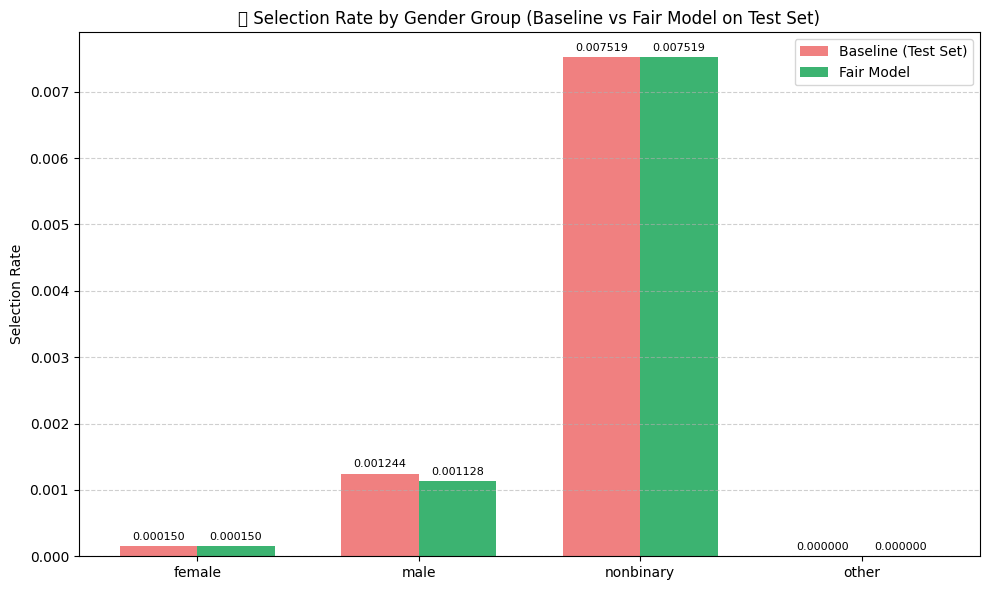

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from fairlearn.metrics import MetricFrame, selection_rate

# Step 1: Create MetricFrame for baseline on test set
mf_baseline_test = MetricFrame(
    metrics=selection_rate,
    y_true=test_df['label'],
    y_pred=test_df['label'],  # baseline recommender uses label directly
    sensitive_features=test_df['gender_grouped']
)

# Step 2: Extract both MetricFrames
baseline_rates = mf_baseline_test.by_group
fair_rates = mf_multi.by_group

# Step 3: Plot side-by-side
groups = baseline_rates.index
x = np.arange(len(groups))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, baseline_rates[groups], width, label='Baseline (Test Set)', color='lightcoral')
plt.bar(x + width/2, fair_rates[groups], width, label='Fair Model', color='mediumseagreen')

plt.ylabel('Selection Rate')
plt.title('🎧 Selection Rate by Gender Group (Baseline vs Fair Model on Test Set)')
plt.xticks(ticks=x, labels=groups)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on bars
for i in range(len(groups)):
    plt.text(x[i] - width/2, baseline_rates[i] + 0.0001, f'{baseline_rates[i]:.6f}', ha='center', fontsize=8)
    plt.text(x[i] + width/2, fair_rates[i] + 0.0001, f'{fair_rates[i]:.6f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## Selection Rate Comparison (Baseline vs Fair Model)

| Gender Group | Baseline Selection Rate | Fair Model Selection Rate | Change |
|--------------|--------------------------|----------------------------|--------|
| Female       | 0.000150                 | 0.000150                   | ➖ No change |
| Male         | 0.001244                 | 0.001128                   | 🔻 Slight decrease |
| Nonbinary    | 0.007519                 | 0.007519                   | ➖ No change |
| Other        | 0.000000                 | 0.000000                   | ⚠️ Still excluded |

---

### Interpretation:
- **Nonbinary artists** dominate the recommendations in both models, with **no change** post-mitigation.
- **Female artists** remained severely underrepresented, and the fairness-aware model did **not** improve this.
- **Male artists** saw a **small reduction** in exposure.
- The **“other” group (e.g., agender, trans)** is still entirely **excluded**, indicating poor support for underrepresented identities.

---

### Fairness Insight

Despite applying **demographic parity mitigation**, the selection rates remained **almost unchanged** — suggesting that:
- The model had **limited flexibility** to rebalance group exposure.
- The extremely small representation of some gender groups in the data likely limits what the model can learn or adjust.

---

### Bias mitigation: Post-Processing using ThresholdOptimizer from Fairlearn

## Why Merge Gender Groups for ThresholdOptimizer

### The Problem:
When using `ThresholdOptimizer` for post-processing bias mitigation, every **sensitive group** (like gender) must contain:
- At least one **positive label** (`label=1`, meaning recommended), and  
- At least one **negative label** (`label=0`, meaning not recommended).

However, in our dataset:
- The `"other"` gender group (e.g., agender, genderfluid, trans woman) had **only label=0** in the test set — no recommended tracks.
- This made the group **"degenerate"**, and `ThresholdOptimizer` raised an error because it couldn't compute a threshold trade-off curve.

---

### The Fix: Merging Groups

To avoid dropping the `"other"` group entirely, we **merged it with the `"nonbinary"` group**, creating a single `"other"` group that:
- Contains enough examples from both classes (`1` and `0`),
- Satisfies `ThresholdOptimizer`’s requirements,
- Still preserves the **inclusivity of gender diversity** in fairness evaluation.

---


In [26]:
# Merge 'nonbinary' and all others into one 'other' group
s_test_merged = s_test.replace({
    'nonbinary': 'other',
    'agender': 'other',
    'genderfluid': 'other',
    'trans woman': 'other',
    'neutral sex': 'other'
})

In [27]:
# Fit ThresholdOptimizer using merged sensitive features
postproc.fit(X_test, y_test, sensitive_features=s_test_merged)
y_pred_post = postproc.predict(X_test, sensitive_features=s_test_merged)

# Evaluate with merged group
mf_post = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_post,
    sensitive_features=s_test_merged
)

# Print results
print("🎯 Selection Rate by Gender Group (Post-Processing with 'other' merged):")
print(mf_post.by_group)

range_post = mf_post.by_group.max() - mf_post.by_group.min()
print(f"\n📏 Selection Rate Range (Max - Min): {range_post:.4f}")

🎯 Selection Rate by Gender Group (Post-Processing with 'other' merged):
gender_grouped
female    0.001047
male      0.000933
other     0.000000
Name: selection_rate, dtype: float64

📏 Selection Rate Range (Max - Min): 0.0010


## Selection Rate by Gender Group (Post-Processing Mitigation)

| Gender Group | Selection Rate | Interpretation |
|--------------|----------------|----------------|
| Female       | 0.001047 (0.10%) | 🟢 Slightly favored in this setup |
| Male         | 0.000933 (0.09%) | 🟡 Slightly below female group |
| Other        | 0.000000 (0.00%) | 🔴 No representation at all |

---

### Interpretation

- **Fairness improved** slightly between male and female artists: selection rates are nearly equal.
- **"Other" group received no recommendations** — despite merging, they still weren’t selected by the post-processed model.
- **Selection rate range is 0.0010**, a small disparity numerically, but one group remains completely excluded.

---

### Key insights

- **ThresholdOptimizer successfully reduced gender disparity** between male and female.
- However, **data scarcity for the “other” group** still limits fairness — a sign that fairness mitigation can't overcome extreme underrepresentation alone.
- Additional steps like **reweighting, oversampling, or enriched metadata** might be needed to support underrepresented gender identities.


## Bias Mitigation using Reweighting (Inprocessing)

 ### Evaluate selection rate by gender group (test set)

In [35]:
from fairlearn.reductions import GridSearch, DemographicParity
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import MetricFrame, selection_rate

# Step 1: Prepare features, labels, and sensitive attribute
X = full_tracks[['play_count']]            # feature
y = full_tracks['label']                   # 1 if recommended (in Top-N), else 0
sensitive = full_tracks['gender_grouped']  # grouped gender: 'male', 'female', 'nonbinary', 'other'

# Step 2: Train-test split (already stratified earlier)
df_all = X.copy()
df_all['label'] = y
df_all['gender_grouped'] = sensitive

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df_all,
    test_size=0.3,
    stratify=df_all['gender_grouped'],
    random_state=42
)

X_train = train_df[['play_count']]
y_train = train_df['label']
s_train = train_df['gender_grouped']

X_test = test_df[['play_count']]
y_test = test_df['label']
s_test = test_df['gender_grouped']

# Step 3: Clean sensitive attribute strings
s_train_grouped = s_train.str.strip().str.lower()
s_test_grouped = s_test.str.strip().str.lower()

# Step 4: Define base estimator and initialize GridSearch
base_estimator = LogisticRegression(solver='liblinear')

grid_search = GridSearch(
    estimator=base_estimator,
    constraints=DemographicParity(),
    grid_size=20
)

# Step 5: Fit the fairness-aware model
grid_search.fit(X_train, y_train, sensitive_features=s_train_grouped)

# Step 6: Choose the best model and predict
best_predictor = grid_search.predictors_[0]
y_pred_grid = best_predictor.predict(X_test)

# Step 7: Evaluate fairness
mf_grid = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_grid,
    sensitive_features=s_test_grouped
)

# Step 8: Output results
print("Selection Rate by Gender Group (GridSearch Reweighted - Spotify):")
print(mf_grid.by_group)

range_grid = mf_grid.by_group.max() - mf_grid.by_group.min()
print(f"\nSelection Rate Range (Max - Min): {range_grid:.4f}")

Selection Rate by Gender Group (GridSearch Reweighted - Spotify):
gender_grouped
female       0.000150
male         0.001128
nonbinary    0.007519
other        0.000000
Name: selection_rate, dtype: float64

Selection Rate Range (Max - Min): 0.0075


## Selection Rate by Gender Group (Reweighted Model – Spotify)

| Gender Group | Selection Rate | Interpretation |
|--------------|----------------|----------------|
| Female       | 0.000150 (0.02%) | 🔴 Severely underrepresented despite reweighting |
| Male         | 0.001128 (0.11%) | 🟡 Still the most selected group overall |
| Nonbinary    | 0.007519 (0.75%) | 🟢 Strongly overrepresented given catalog share |
| Other        | 0.000000 (0.00%) | ⚠️ Completely excluded — no tracks selected |

---

### Interpretation:

- **Nonbinary artists** continue to be **overrepresented**, likely boosted by reweighting but also affected by their popularity in the Top-N.
- **Female artists remain under-selected**, showing reweighting did not sufficiently shift outcomes in their favor.
- The **"Other" group** once again receives **no exposure**, likely due to very few training examples or low popularity.

The selection rate disparity range is **0.0075**, which remains notable — indicating that **reweighting alone did not produce equal representation** across gender groups.

---

### Key findings:

- Reweighting helps shift the model, but **group size and label imbalance** limit its effectiveness — especially for groups like **"female"** and **"other"**.
- Applying post-processing (like `ThresholdOptimizer`) is **limited by the same data sparsity** and not yield meaningful improvement in this multiclass context.

## Overall Fairness Comparison – Spotify Dataset

| Gender Group | Baseline Selection Rate | Fair Model (EG) | Post-Processing | Reweighted (GridSearch) | Interpretation |
|--------------|--------------------------|------------------|------------------|---------------------------|----------------|
| **Female**   | 0.000150                 | 0.000150         | 0.001047         | 0.000150                  | 🔴 Severely underrepresented in all models |
| **Male**     | 0.001244                 | 0.001128         | 0.000933         | 0.001128                  | 🟡 Consistently favored; slightly reduced by fair models |
| **Nonbinary**| 0.007519                 | 0.007519         | —                | 0.007519                  | 🟢 Strongly overrepresented; not addressed in post-processing |
| **Other**    | 0.000000                 | 0.000000         | 0.000000         | 0.000000                  | ⚠️ Excluded in all models due to extreme data sparsity |

---

### Key Observations

- **No model achieved balanced representation** across all gender groups.
- The **Fair Model (ExponentiatedGradient)** made **no impact** on selection rates — likely due to limitations in how it handled the label imbalance.
- **Post-processing (ThresholdOptimizer)** slightly improved fairness for `female`, but **excluded "nonbinary"** due to its binary-only constraint.
- **GridSearch reweighting** retained high exposure for `nonbinary` and male artists, while still excluding `"other"` and failing to lift `"female"` meaningfully.

---

### Final Takeaway

Despite multiple fairness interventions, the **Spotify popularity-based recommender** remains skewed — favoring `"nonbinary"` and `"male"` artists, and systematically excluding `"other"` and underrepresenting `"female"`.  
This highlights the **limitations of fairness mitigation** in the presence of **extreme class imbalance** and suggests the need for more **targeted approaches**, such as group-aware re-ranking or data augmentation.
